In [1]:
import torch

import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import cv2

In [2]:
test =np.load('/l/users/xiangjian.hou/hc701-fed_data/messidor2/test/20051020_43882_0100_PP.npy',allow_pickle=True).item()

In [3]:
test['image'].shape

(1488, 2240, 3)

413 51 1392 1400


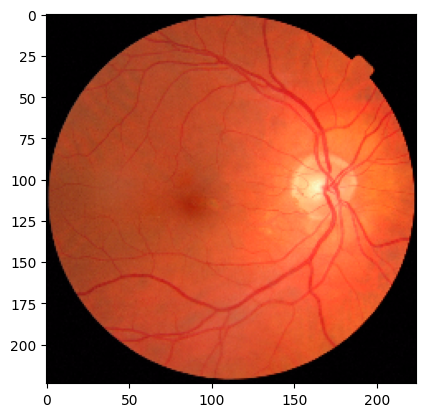

In [4]:
gray = cv2.cvtColor(test['image'], cv2.COLOR_BGR2GRAY)

# Threshold the image to remove the black edges
_, thresholded = cv2.threshold(gray, 2, 255, cv2.THRESH_BINARY)

# Find the contours in the thresholded image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding box of the largest contour
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the image to the ROI
cropped = test['image'][y:y+h, x:x+w]
# show the image
resized = cv2.resize(cropped, (224, 224))
plt.imshow(resized)